In [227]:
import numpy as np
import pandas as pd
from pathlib import Path

In [228]:
#Load data into data frame
#Data was generated from the "GenerateData.ipynb notebook"
crypto_df = pd.read_csv(Path('../Instructions/crypto_data.csv'))


In [229]:
crypto_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [230]:
crypto_df.dropna()
crypto_df=crypto_df.rename(columns={"Unnamed: 0": "Symbol"})
crypto_df

,Symbol,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [231]:

crypto1_df=crypto_df[crypto_df["IsTrading"]== True]
crypto1_df=crypto1_df[crypto1_df["TotalCoinsMined"] > 0]
crypto1_df=crypto1_df.drop(columns="IsTrading")
crypto1_df=crypto1_df.drop(columns="CoinName")
crypto1_df=crypto1_df.drop(columns="Symbol")

def func(string):

    a_new_string =string.upper().split('/')
    return a_new_string[0]
crypto1_df["ProofType"]=crypto1_df["ProofType"].apply(func)
crypto1_df["Algorithm"]=crypto1_df["Algorithm"].apply(func)
crypto1_df.head()
# crypto1_df["TotalCoinsMined"].unique()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,SCRYPT,POW,4.199995e+01,42
2,SCRYPT,POW,1.055185e+09,532000000
5,X13,POW,2.927942e+10,314159265359
7,SHA-256,POW,1.792718e+07,21000000
8,ETHASH,POW,1.076842e+08,0


In [232]:

crypto1_df.dtypes


Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [233]:
crypto1_df['TotalCoinSupply'] = crypto1_df['TotalCoinSupply'].astype(float, errors = 'raise')


In [234]:
crypto1_df.dtypes
crypto1_df=pd.get_dummies(crypto1_df)


In [235]:
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
crypto1_scaled_df=normalize(crypto1_df)
# crypto1_scaled_df = StandardScaler().fit_transform(crypto1_df)


In [236]:
crypto1_scaled_df
crypto1_scaled_df = pd.DataFrame(crypto1_scaled_df)

In [237]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
pca = PCA(n_components=0.9)

# Get two principal components for the data.
crypto2_df = pca.fit_transform(crypto1_scaled_df)


In [238]:
len(crypto2_df[:,0])

532

In [239]:
len(crypto2_df[0,:])

1

In [240]:
tsne = TSNE(learning_rate=1000)
# Reduce dimensions
tsne_features = tsne.fit_transform(crypto2_df)
tsne_features.shape
tsne_features

C:\Users\igrang\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


array([[-15.887084 ,  24.708538 ],
       [-22.227345 ,  15.502339 ],
       [ -1.2421215, -20.407444 ],
       ...,
       [  6.7382336,  19.555723 ],
       [ 17.037039 ,  -3.5085783],
       [  2.7598128, -18.436129 ]], dtype=float32)

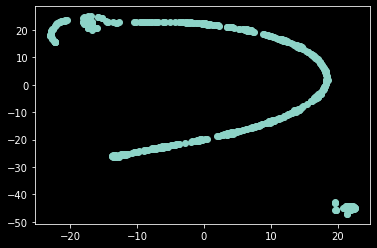

In [241]:
df=pd.DataFrame();
df['x'] = tsne_features[:,0]

# The second column of transformed features
df['y'] = tsne_features[:,1]
plt.scatter(df['x'], df['y'])
plt.show()

In [242]:
from sklearn.cluster import KMeans
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypto2_df)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,71.148619
1,2,26.207406
2,3,7.588565
3,4,3.392321
4,5,2.103110


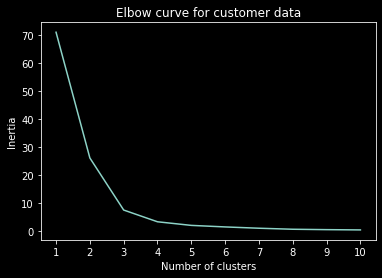

In [243]:
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

In [244]:

def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data
clusters = get_clusters(3, crypto1_scaled_df)
print(clusters.head())

          0         1    2    3    4    5    6    7    8    9  ...   80   81  \
0  0.706906  0.706907  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1  0.892930  0.450195  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2  0.092797  0.995685  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3  0.649270  0.760558  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
4  1.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

             82   83   84   85   86   87   88  class  
0  1.683111e-02  0.0  0.0  0.0  0.0  0.0  0.0      1  
1  8.462311e-10  0.0  0.0  0.0  0.0  0.0  0.0      1  
2  3.169364e-12  0.0  0.0  0.0  0.0  0.0  0.0      0  
3  3.621706e-08  0.0  0.0  0.0  0.0  0.0  0.0      1  
4  9.286411e-09  0.0  0.0  0.0  0.0  0.0  0.0      2  

[5 rows x 90 columns]


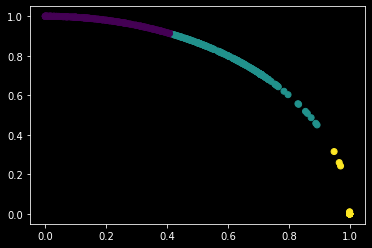

In [245]:

plt.scatter(clusters.iloc[:,0], clusters.iloc[:,1], c=clusters['class'])

plt.show()

